# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [30]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [31]:
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

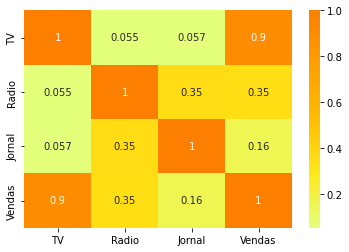

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# display(tabela.corr())

# criar o grafico
sns.heatmap(tabela.corr(), cmap="Wistia", annot=True)

# exibir o grafico
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [33]:
# y -> quem voce quer prever (vendas)
# x-> o resto todo (quem voce vai usar pra fazer a previsao)

x = tabela[["TV", "Radio", "Jornal"]]
y = tabela["Vendas"]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# cria a inteligencia artificial
modelo_regressaoLinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treina a inteligencia artificial
modelo_regressaoLinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [35]:
# fazer previsao nos testes

previsao_regressaoLinear = modelo_regressaoLinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaoLinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.8898496598011951
0.9323715925726211


#### Visualização Gráfica das Previsões

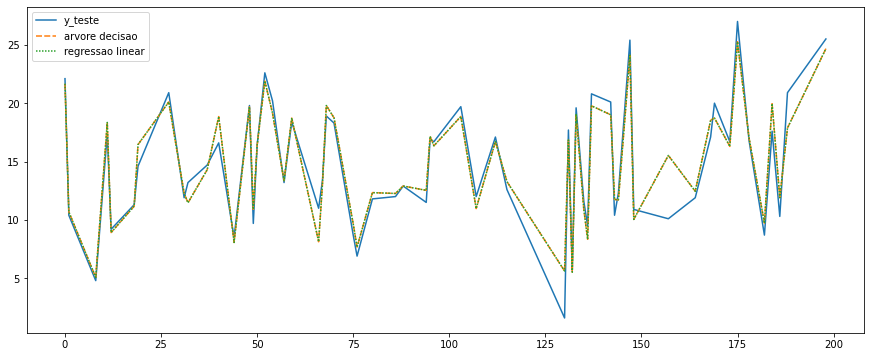

In [36]:
tabela_auxiliar = pd.DataFrame() # cria tabela vazia
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["arvore decisao"] = previsao_arvoredecisao
tabela_auxiliar["regressao linear"] = previsao_arvoredecisao

plt.figure(figsize=(15,6)) #tamanho da figura
sns.lineplot(data=tabela_auxiliar) # cria um grafico de linha
plt.show() # exibe

#### Como fazer uma nova previsão?

In [37]:
# o melhor modelo é a árvore de decisão

novos = pd.read_csv("novos.csv")
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [38]:
print(modelo_arvoredecisao.predict(novos))

[ 7.786  8.645 19.783]
